Signalvergleich

* *WPS*: Derzeitige "Wind-Peak-Shaving" Operationalisierung im PE-Excel
* *RES*: Prognostizierte Residuallasten der jährlichen Szenarien
* (*AVG*: Rolling-Average Profile unterschiedlicher Herkunft (MA Nutz, Preissignale))


Die Signal-Analyse läuft für alle betrachteten Signale anhand folgender Schritte ab:
1. Normalisierung der Quelldaten auf einen *kontinuierlichen* Wertebereich von 0-1
    * WPS: Anhand der Nennleistung (bzw. der maximalen Leistung)
    * RES: Anhand der maximalen positiven Residuallast
    * (zu prüfen: AVG: Mittelwert - Maximalwert -> 0 - 1)
2. Diskretisierung auf zwei Werte: 0, 1 anhand eines **cut-off** Parameters
3. Darstellung der Signaleigenschaften
    * Verhältnis zwischen Zeiträumen von Signal / Nicht-Signal
    * Mittelwert und Verteilung der Signaldauer
    * Mittelwert und Verteilung der Dauer von Nicht-Signalen

In [108]:
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import pandas as pd
import FLUCCOplus.transform as traffo
import FLUCCOplus.signal as fps
import FLUCCOplus.plots as fpp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
source = fps.load_peexcel()

(<Figure size 864x432 with 2 Axes>, <AxesSubplot:>)

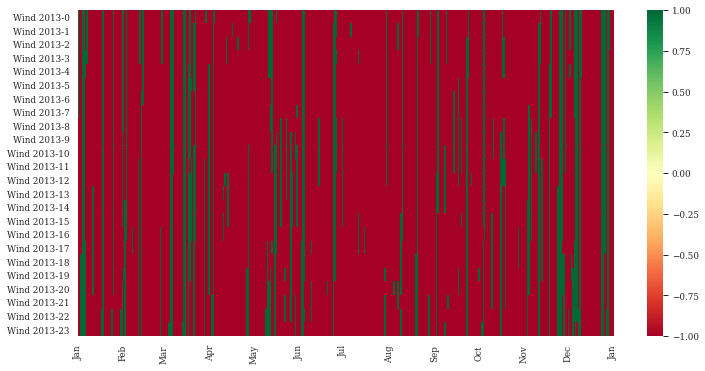

In [95]:
nm = traffo.normalize(source)
dc = traffo.discretize(nm, separator=0.5, min=0., max=1.)

fpp.heatmap_figure(dc["Wind 2013"])

In [124]:
web = fps.load_web(2018)

,Neuhof I,Neuhof III,Maustrenk,STERN I,STERN II,STERN III
Datetime UCT,,,,,,
2018-01-01 00:00:00,0.370625,0.423402,0.691714,0.225750,0.315563,0.287625
2018-01-01 01:00:00,0.400833,0.495427,0.694071,0.144187,0.201469,0.189000
2018-01-01 02:00:00,0.450625,0.566986,0.936000,0.243375,0.233500,0.285375
2018-01-01 03:00:00,0.562500,0.584189,0.594857,0.395062,0.264594,0.265125
2018-01-01 04:00:00,0.273125,0.337316,0.312857,0.669188,0.564125,0.504188
...,...,...,...,...,...,...
2018-12-31 19:00:00,0.093333,0.076680,0.123429,0.000000,0.000000,0.000000
2018-12-31 20:00:00,0.101458,0.080857,0.146571,0.000000,0.000000,0.000000
2018-12-31 21:00:00,0.231458,0.345099,0.081429,0.000000,0.000000,0.000000


## WEB Windsignale
Zweite Art von Signalen stellen die tatsächlich gemessenen Windprofile der W.E.B.

(<Figure size 864x432 with 2 Axes>, <AxesSubplot:>)

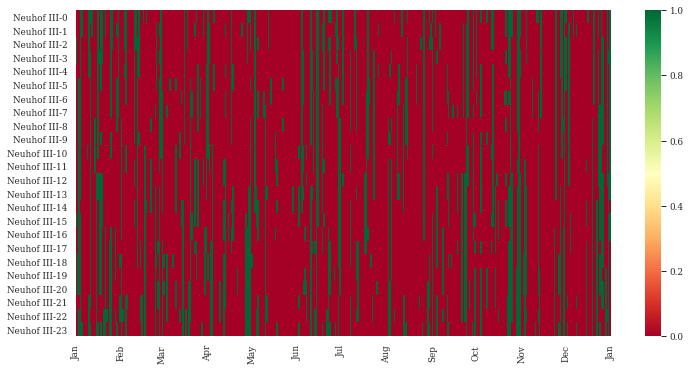

In [133]:
web_dc = traffo.discretize(web, separator=0.5, min=0., max=1.)
fpp.heatmap_figure(web_dc["Neuhof III"])

In [134]:

df = fps.load_spotprice()

Needs to be implemented: loads the drexelco2s signals


In [135]:
df = fps.load_pypsa_avg()

Needs to be implemented: loads the rolling average signals from MAx Nutz MA with PyPSA
